**ANN Actication functions**

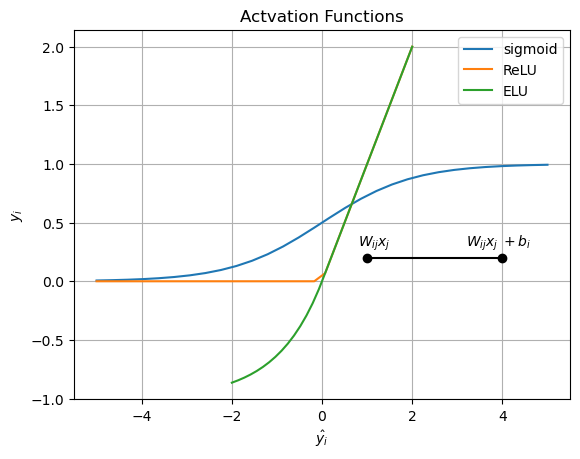

In [24]:
xwertre1=range(-5,5,length=30)
xwertre2=range(-5,2,length=30)
xwertre3=range(-2,2,length=30)

plot(xwertre1,σ.(xwertre1),label="sigmoid")
plot(xwertre2,relu.(xwertre2),label="ReLU")
plot(xwertre3,elu.(xwertre3),label="ELU")

plot([1,4],[0.2,0.2],"-o",color="black")
text(0.8, 0.3, L"W_{ij}x_j")
text(3.2, 0.3, L"W_{ij}x_j\;+b_i")

#kosmetik
title("Actvation Functions")
ylabel(L"y_i")
xlabel(L"\hat{y_i}")
legend()
grid()

#save plot with good enougt dpi
plt.savefig("actvation functions",dpi=400)

**ANN during gradient training**

In [1]:
using Flux
using Zygote
#using Plots
using PyPlot
using LinearAlgebra

using Flux: train! , params

In [25]:
#Inizalisieren das modells (Input muss ein Vektor sein, auch für 1d)
width=1000

model1 = Chain(
       Dense(1, width,elu), # elu, so heißt die aktivierungsfunktion
       Dense(width, width,elu),
       Dense(width, 1)
)

#ps=params(model1);#dieses Parameter werden im trainig verändert, #ps=[W_1,b_1,W_2,b_2,...]


In [26]:
#Ich kann die parameter nicht zwischenspeichern? man muss das Objekt ps Elementweise zwischenspeichern

# ps=params(model1)
# test=copy(ps)
# test2 = copy(ps[1])
# Flux.train!(loss, ps, [(x_train, y_train)], opt)
# ps[1] == test[1]

In [27]:
#Verlustfunktion
loss(x,y) = norm(model1(x) - y)

#Optimisiwerungsalgorithmus

opt = Descent(0.001) #Gradientenverfahren

Descent(0.001)

In [28]:
#Inizialisiern der Trainingsdatenpunkte
x_predict = reshape(range(-2 , 5,length = 20),(1,:)) # Format: = [3;4;1;6] Matrix

x_train = reshape([-1.0, 4.0,2],(1,:))    #Anzahl spalten = Anzahl an Trainingsdaten
         
y_train = Matrix{Float64}(undef,1,length(x_train)) #Wenn y=[-3 ; 4] dann wird das als array abgespechert...
y_train[1] = -3.0
y_train[2] = 4   
y_train[3] = 1

1

In [29]:
#Training

#Parameter für das Training
epochs = 1000  #Also epochs+1 verschiedene parameter/ANN's
modulo_function = 100
modulo_loss = 100

loss_history = []
function_history = []
parameter_history = []

#Start_loss
train_loss_0 = loss(x_train, y_train)
push!(loss_history, train_loss_0)

#Startparameter
ps=params(model1)      #Man muss dieses objekt initializieren,dmait man das training durchführen kann
ps_dummy = []    #copy(ps) kopiert nicht wirklich, aber bei copy(ps[1]) wird es kopiert, also Elementweise kopieren
for  p in ps                             
push!(ps_dummy, copy(p))
end
push!(parameter_history, copy(ps_dummy))

#Code für das Traning
for i in 1:epochs
    
    #Funktionszwischenwerte nach "modulo" schritten abspeichern
    if mod(i,modulo_function) == 0  
        
    y_predict = reshape(model1(x_predict),(:,1)) #Für plot() muss man wieder in spaltenvektoren formen.
    push!(function_history,copy(y_predict))
    end
    
    #Traning
    
    # train model
     Flux.train!(loss, ps, [(x_train, y_train)], opt)  # 3te Argument muss Tupel sein
    
    #So gehts auch,aber wozu? oben ist das ein 1zeiler
    
#     # !!!!!!! NEU
#     gs = gradient(ps) do
#         loss(x_train,y_train)
#     end
#     Flux.Optimise.update!(opt, ps, gs)
    
    if mod(i,modulo_loss) == 0  
        
        
    #speichere Daten, jeden modulo_loss-ten
        train_loss = loss(x_train, y_train)
        push!(loss_history, train_loss)
        
        ps_dummy = []    #copy(ps) kopiert nicht wirklich, aber bei copy(ps[1]) wird es kopiert, also Elementweise implementiern
        for  p in ps                             
            push!(ps_dummy, copy(p))
        end
        push!(parameter_history, copy(ps_dummy))
    end
    
end

#Achtung mehrfaches ausführen trainiert ANN weiter loss/parameter_history wird überschrieben.

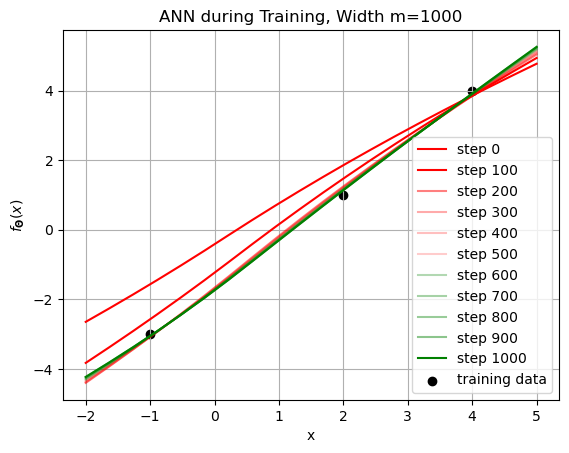

In [30]:
x_predict = reshape(x_predict,(:,1))    #Für plot() muss man wieder in spaltenvektoren formen.

#Funktion während des trainniings Plotten
plot(x_predict,function_history[1],label="step $(0)",color="red")

for i in 1:length(function_history[1:end-1])
    
    if i<= length(function_history)/2
    plot(x_predict,function_history[i+1],label="step $(i*modulo_function)",color="red",alpha=1/i)
    end
    if i> length(function_history)/2
    plot(x_predict,function_history[i+1],label="step $(i*modulo_function)",color="green",alpha=0.05*i)
    end
    
end

plot(x_predict,function_history[end],label="step $(epochs)",color="green")

#Trainngsdaten Plotten
scatter(reshape(x_train,(:,1)),reshape(y_train,(:,1)), label="training data", color="black")


#kosmetik
title("ANN during Training, Width m=$(width)")
ylabel(L"f_{\mathbf{\Theta}}(x)")
xlabel("x")
legend()
grid()

#save plot
plt.savefig("ANN Plots/ANN Training width 1000",dpi=400)

In [15]:
#Daten sammeln für den plot: führe obigen code einfach für 3 versch. "width" aus (10,100,1000)
#und speichere die Ergebnisse kurz hier in einzelnen zellen
loss_history1 = copy(loss_history)
parameter_history1 = copy(parameter_history);

In [24]:
loss_history2 = copy(loss_history)
parameter_history2 = copy(parameter_history);

In [31]:
loss_history3 = copy(loss_history)
parameter_history3 = copy(parameter_history);

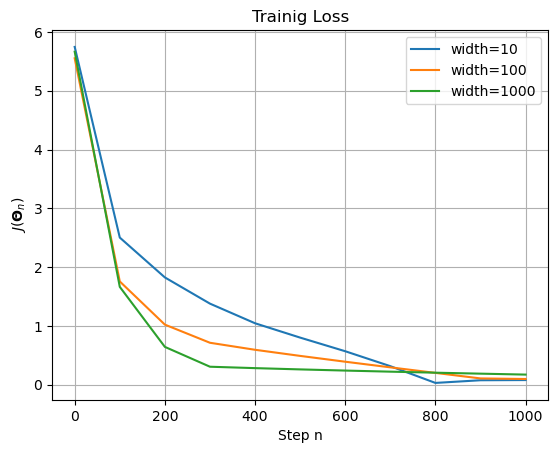

In [36]:
#Plotten von loss nach jedem step
step_range= range(0,epochs, length= Int64((epochs/modulo_loss +1))) #+1 wegen startwert

plot(step_range,loss_history1,label="width=10")
plot(step_range,loss_history2,label="width=100")
plot(step_range,loss_history3,label="width=1000") 

#kosmetik
title("Trainig Loss")
ylabel(L"J(\mathbf{\Theta}_n)")
xlabel("Step n")
legend()
grid()

#save plot
plt.savefig("ANN Plots/Trainingloss",dpi=400)

In [32]:
#Zeigen, dass sich die gewichte kaum ändern, alle parameter in einen Vektor speichern

    P_history1 = [] #als einträge jweils die vektoren
for ps in parameter_history1
    P_S  = []
        
    for i in 1:length(ps)  #length(ps) bei alln width gleich, weil gleiche ANN architektur
    P_S = vcat(P_S, reshape(ps[i],(:,1))) #Reshape, falls parameter als matrix abgespeichert
    end
    
    push!(P_history1,copy(P_S))   
end

#relativer Unterschied
rel_diff1 =  []
P_01 = P_history1[1]

for P_S in P_history1[1:end]
push!(rel_diff1, norm(P_S - P_01) ./(norm(P_01)))
end

In [33]:
#Derselbe Code nochmal, Auch für die anderen größen width = 100 und 1000
    P_history2 = [] #als einträge jweils die vektoren
for ps in parameter_history2
    P_S  = []
        
    for i in 1:length(ps)
    P_S = vcat(P_S, reshape(ps[i],(:,1))) #Reshape, falls parameter als matrix abgespeichert
    end
    
    push!(P_history2,copy(P_S))   
end

#relativer Unterschied
rel_diff2 =  []
P_02 = P_history2[1]

for P_S in P_history2[1:end]
push!(rel_diff2, norm(P_S - P_02) ./(norm(P_02)))
end


In [34]:
#--------------------------------------------------------
    P_history3 = [] #als einträge jweils die vektoren
for ps in parameter_history3
    P_S  = []
        
    for i in 1:length(ps)
    P_S = vcat(P_S, reshape(ps[i],(:,1))) #Reshape, falls parameter als matrix abgespeichert
    end
    
    push!(P_history3,copy(P_S))   
end

#relativer Unterschied
rel_diff3 =  []
P_03 = P_history3[1]

for P_S in P_history3[1:end]
push!(rel_diff3, norm(P_S - P_03) ./(norm(P_03)))
end

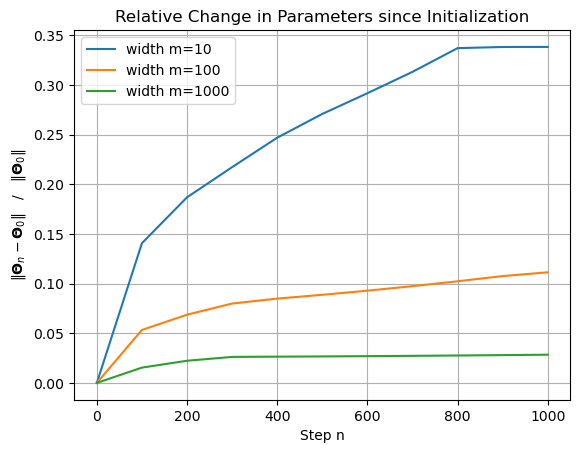

In [38]:
#Visualisierung der Änderung der Gewichte
plot(step_range,rel_diff1 ,label="width m=10")
plot(step_range,rel_diff2,label="width m=100")
plot(step_range,rel_diff3 ,label="width m=1000")

#kosmetik
title("Relative Change in Parameters since Initialization")
ylabel(L"\Vert\mathbf{\Theta}_n -\mathbf{\Theta}_0\Vert\quad/\quad\Vert\mathbf{\Theta}_0\Vert")
xlabel("Step n")
legend()
grid()

#save plot
plt.savefig("ANN Plots/rel_param_change",dpi=400)